In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
import fidle.pwk as pwk

In [2]:
# Reconstruct a new model from the final model:
model = tf.keras.models.load_model("saved model")

In [3]:
# Function definition for frame prediction
def predict_frame(img, model):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) > 0.5).astype("int32")
    if(prediction[0][0]==1):
        return("Accident Detected")
    else:
        return("No Accident")

In [4]:
# Turn test image into a tensor
test_img_path = 'Accident dataset/noAccident.jpg'
test_img_tensor = tf.io.read_file(test_img_path)
test_img_tensor = tf.image.decode_image(test_img_tensor, channels=3)
test_img_tensor = tf.image.resize(test_img_tensor, [250, 250])
test_img_tensor = tf.cast(test_img_tensor, tf.int32)

print(test_img_tensor)
print("dtype of tensor:", test_img_tensor.dtype)

tf.Tensor(
[[[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [251 251 251]
  [243 243 243]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [251 251 251]
  [243 243 243]]

 [[254 255 255]
  [254 255 255]
  [254 255 255]
  ...
  [255 255 255]
  [251 251 251]
  [243 243 243]]

 ...

 [[106 104 107]
  [110 108 111]
  [115 113 116]
  ...
  [111 111 113]
  [112 112 114]
  [113 113 115]]

 [[105 103 106]
  [110 108 111]
  [114 112 115]
  ...
  [114 114 116]
  [113 113 115]
  [112 112 114]]

 [[105 103 106]
  [109 107 110]
  [114 112 115]
  ...
  [114 114 116]
  [110 110 112]
  [107 107 109]]], shape=(250, 250, 3), dtype=int32)
dtype of tensor: <dtype: 'int32'>


1/1 [==============================] - 1s 1s/step
['No Accident']


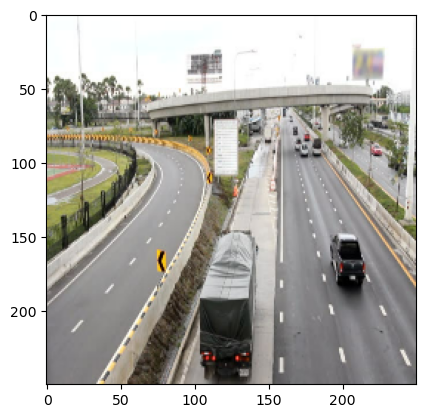

In [5]:
# test image from your computer
image=[]
label=[]

img_height = 250
img_width = 250

frame = test_img_tensor
image.append(frame)
label.append(predict_frame(frame, model))

plt.imshow(test_img_tensor.numpy())
print(label)

In [6]:
# main loop 
i = 1
cap = cv2.VideoCapture(0)
while True:
    grabbed, frame = cap.read()
    resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
    image.append(frame)
    label.append(predict_frame(resized_frame))
    if (label == "Accident Detected") :
        # Use GPS module to get position
        # Use 4G module to send image and localization to Emergency dep   
    else if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    i+=1
cap.release()
cv2.destroyAllWindows()

IndentationError: expected an indented block after 'if' statement on line 9 (34579422.py, line 12)